In [1]:
import pandas as pd
import numpy as np
import pickle#Pickle in Python is primarily used in serializing and deserializing a Python object.
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("ipl.csv")#Loading the data


In [3]:
data.columns = ['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_6', 'wickets_last_6', 'striker',
       'non-striker', 'total']

In [4]:
data.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_6,wickets_last_6,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [5]:
data = data.drop(['batsman','bowler','mid','striker','non-striker','venue'],axis=1).copy()


In [6]:
data.shape

(76014, 9)

In [7]:
data['bat_team'].unique()
print("Data_shape:",data.shape)

Data_shape: (76014, 9)


In [8]:
consistent_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
                    'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
                    'Delhi Daredevils', 'Sunrisers Hyderabad']
#removing inconsistent teams and selecting only consistent_teams from  the dataset
print('Before removing inconsistent teams: {}'.format(data.shape))



Before removing inconsistent teams: (76014, 9)


In [9]:
data = data[(data['bat_team'].isin(consistent_teams)) & (data['bowl_team'].isin(consistent_teams))]
print('After removing inconsistent teams: {}'.format(data.shape))

After removing inconsistent teams: (53811, 9)


In [10]:
data.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_6,wickets_last_6,total
0,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [11]:
# Removing the first 6 overs data in every match
print('Before removing first 6 overs data: {}'.format(data.shape))
data = data[data['overs']>=6.0]
print('After removing first 6 overs data: {}'.format(data.shape))






Before removing first 6 overs data: (53811, 9)
After removing first 6 overs data: (37389, 9)


In [12]:
data.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_6,wickets_last_6,total
38,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,62,1,6.1,55,1,222
39,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,63,1,6.2,52,1,222
40,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,64,1,6.3,47,1,222
41,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,66,1,6.4,45,1,222
42,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,67,1,6.5,46,1,222


In [13]:
# Converting the date Column form string into Data time object 

print("Before converting date column from string to datetime object: {}".format(type(data.iloc[0,0])))


Before converting date column from string to datetime object: <class 'str'>


In [14]:
# Converting the column 'date' from string into datetime object
from datetime import datetime
print("Before converting 'date' column from string to datetime object: {}".format(type(data.iloc[0,0])))
data['date'] = data['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
print("After converting 'date' column from string to datetime object: {}".format(type(data.iloc[0,0])))




Before converting 'date' column from string to datetime object: <class 'str'>
After converting 'date' column from string to datetime object: <class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [15]:
#data.corr(method="pearson")

In [16]:

#corr_matrix = data.corr()
#top_corr_features = corr_matrix.index

In [17]:

#top_corr_features

In [18]:
#import seaborn as sns
#plt.figure(figsize=(13,10))

In [19]:
#g = sns.heatmap(data=data[top_corr_features].corr(), annot=True, cmap='RdYlGn')


In [20]:
encoded_data = pd.get_dummies(data = data, columns= ["bat_team",'bowl_team'])



In [21]:

encoded_data .columns

Index(['date', 'runs', 'wickets', 'overs', 'runs_last_6', 'wickets_last_6',
       'total', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight Riders',
       'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad'],
      dtype='object')

In [22]:
encoded_data.head()

,date,runs,wickets,overs,runs_last_6,wickets_last_6,total,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,...,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
38,2008-04-18,62,1,6.1,55,1,222,False,False,False,...,False,False,False,False,False,False,False,False,True,False
39,2008-04-18,63,1,6.2,52,1,222,False,False,False,...,False,False,False,False,False,False,False,False,True,False
40,2008-04-18,64,1,6.3,47,1,222,False,False,False,...,False,False,False,False,False,False,False,False,True,False
41,2008-04-18,66,1,6.4,45,1,222,False,False,False,...,False,False,False,False,False,False,False,False,True,False
42,2008-04-18,67,1,6.5,46,1,222,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [23]:
ncoded_data= encoded_data[['date', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils', 'bat_team_Kings XI Punjab',
              'bat_team_Kolkata Knight Riders', 'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
              'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
              'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils', 'bowl_team_Kings XI Punjab',
              'bowl_team_Kolkata Knight Riders', 'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
              'bowl_team_Royal Challengers Bangalore', 'bowl_team_Sunrisers Hyderabad',
              'overs', 'runs', 'wickets', 'runs_last_6', 'wickets_last_6', 'total']]



In [24]:
ncoded_data.shape
ncoded_data.head()


,date,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,...,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad,overs,runs,wickets,runs_last_6,wickets_last_6,total
38,2008-04-18,False,False,False,True,False,False,False,False,False,...,False,False,True,False,6.1,62,1,55,1,222
39,2008-04-18,False,False,False,True,False,False,False,False,False,...,False,False,True,False,6.2,63,1,52,1,222
40,2008-04-18,False,False,False,True,False,False,False,False,False,...,False,False,True,False,6.3,64,1,47,1,222
41,2008-04-18,False,False,False,True,False,False,False,False,False,...,False,False,True,False,6.4,66,1,45,1,222
42,2008-04-18,False,False,False,True,False,False,False,False,False,...,False,False,True,False,6.5,67,1,46,1,222


In [25]:
# # dt can be used to access the values of the series as datetimelike and return several properties.
##Pandas Series. dt. minute attribute return a numpy array containing the minutes of the datetime in the underlying data of the given series object.

X_train = ncoded_data.drop("total",axis=1)[ncoded_data['date'].dt.year <=2016]
X_test = ncoded_data.drop("total",axis =1)[ncoded_data['date'].dt.year >= 2017]
X_val = ncoded_data.drop("total",axis=1)[ncoded_data['date'].dt.year >=2017]



In [26]:
Y_train = ncoded_data[encoded_data['date'].dt.year <= 2016]['total'].values
Y_test = ncoded_data[encoded_data['date'].dt.year >= 2017]['total'].values
Y_val = ncoded_data[encoded_data['date'].dt.year >= 2017]['total'].values



In [27]:
X_train = X_train.drop("date",axis=1)
X_test = X_test.drop("date",axis = 1)
X_val = X_val.drop("date",axis=1)


In [28]:
#from sklearn import preprocessing
#min_max_scaler = preprocessing.MinMaxScaler()   #normalising the data
#X_train = min_max_scaler.fit_transform(X_train)

X_train
print("X_train shape:",X_train.shape)
print("X_test shape:",X_test.shape)
print("Y_train_shape",Y_train.shape)
print("Y_test_shape:",Y_test.shape)
print("X_val_shape:",X_val.shape)
print("Y_val_shape:",Y_val.shape)


X_train shape: (34797, 21)
X_test shape: (2592, 21)
Y_train_shape (34797,)
Y_test_shape: (2592,)
X_val_shape: (2592, 21)
Y_val_shape: (2592,)


In [29]:
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_regressor.fit(X_train,Y_train)





LinearRegression()

In [30]:
#creating a pickle file for  the calssifier
filename = 'Ipl_first_innings_score_prediction_model.pkl'
pickle.dump(linear_regressor,open(filename,'wb'))




In [31]:
from sklearn.linear_model import Ridge 
from sklearn.model_selection import GridSearchCV

In [32]:
ridge = Ridge()
parameters={'alpha' :[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X_train, Y_train)

C:\Users\dell\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=1.66121e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\dell\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=1.79319e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\dell\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=1.73105e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\dell\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=1.77573e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\dell\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: Li

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             scoring='neg_mean_squared_error')

In [33]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 40}
-302.8163728682664


In [34]:
prediction = ridge_regressor.predict(X_test)

C:\Users\dell\AppData\Local\Temp\ipykernel_684\1894282064.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y_test-prediction)


<Axes: ylabel='Density'>

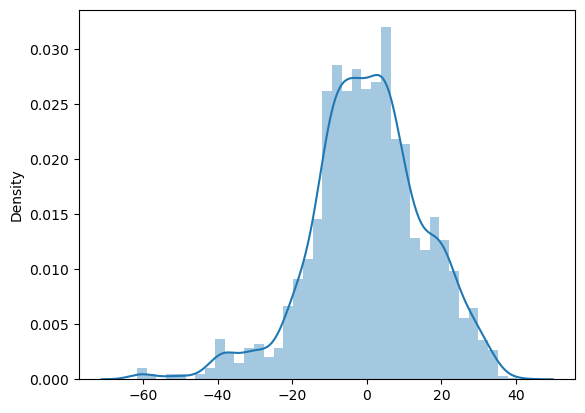

In [35]:
import seaborn as sns
sns.distplot(Y_test-prediction)

In [36]:
from sklearn import metrics
import numpy as np 
print("MAE:", metrics.mean_absolute_error(Y_test, prediction))
print("MSE:", metrics.mean_squared_error(Y_test, prediction))
print("RMSE:",np.sqrt( metrics.mean_squared_error(Y_test, prediction)))

MAE: 11.694089414835116
MSE: 230.30382185213392
RMSE: 15.17576429219082


In [37]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [38]:
lasso = Lasso()
parameters={'alpha' :[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lasso_regressor.fit(X_train, Y_train)

C:\Users\dell\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.912e+06, tolerance: 2.349e+03
  model = cd_fast.enet_coordinate_descent(
C:\Users\dell\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.765e+06, tolerance: 2.365e+03
  model = cd_fast.enet_coordinate_descent(
C:\Users\dell\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.986e+06, tolerance: 

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             scoring='neg_mean_squared_error')

In [39]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 1}
-295.96946613883756


In [40]:
pred = lasso_regressor.predict(X_test)

C:\Users\dell\AppData\Local\Temp\ipykernel_684\2562227795.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y_test-pred)


<Axes: ylabel='Density'>

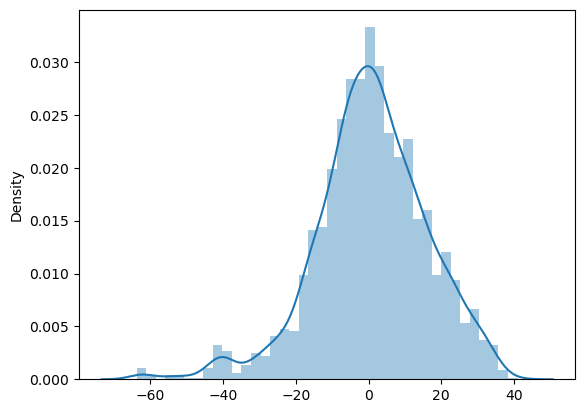

In [41]:
import seaborn as sns
sns.distplot(Y_test-pred)

In [42]:
from sklearn import metrics
import numpy as np 
print("MAE:", metrics.mean_absolute_error(Y_test, pred))
print("MSE:", metrics.mean_squared_error(Y_test, pred))
print("RMSE:",np.sqrt( metrics.mean_squared_error(Y_test, pred)))

MAE: 11.787359739138841
MSE: 240.41586915735692
RMSE: 15.505349694778152
